<a href="https://colab.research.google.com/github/JackyPro/AI_Course/blob/main/Day1/Perceptron_iris_3class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.設定：複製一份程式到自己的雲端上，並且開啟副本

<table>
  <tr>
    <td bgcolor=#ccffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/1.png" width=70%>
      </center>
      <center><font size="6">Step 1<br /><br /></font></center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#D1EEEE>
      <center>
        <img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/2.png" width=70%>
      </center>
      <center>
        <font size="6">Step 2<br /><br /></font>
        <font size="4">確認是否為副本<br />
        若為副本，代表程式檔已經複製在自己的雲端<br />
        可以自行修改檔名<br /><br /></font>
      </center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#ffffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/3.png" width=70%>
      </center>
      <center><font size="6">Step 3<br /><br /></font></center> 
    </td>
  </tr>
</table>



# 2.Envs

In [ ]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9522412618778678969
]


In [ ]:
import platform
import tensorflow
import tensorflow.keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(tensorflow.keras.__version__))

Platform: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version: 2.5.0
Keras version: 2.5.0


In [ ]:
!python -V
platform.python_version()

Python 3.7.11


'3.7.11'

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%pwd

'/content'

In [ ]:
import numpy as np
import pandas as pd 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# sci-kit learn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# 3.Data Pre-processing

## a.load data

In [ ]:
# Loading the Iris dataset from scikit-learn
iris = datasets.load_iris()

In [ ]:
dfx = pd.DataFrame(iris['data'], columns=iris['feature_names'])
dfy = pd.DataFrame(iris['target'], columns=['target'])
df  = pd.concat([dfx, dfy], axis=1)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
dff = df
dff['species'] = iris['target']
#dff
dff['species'] = dff['species'].map({ 0:iris['target_names'][0],
                                    1:iris['target_names'][1], 
                                    2:iris['target_names'][2]})
del dff['target']
dff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## b.dataset visualization

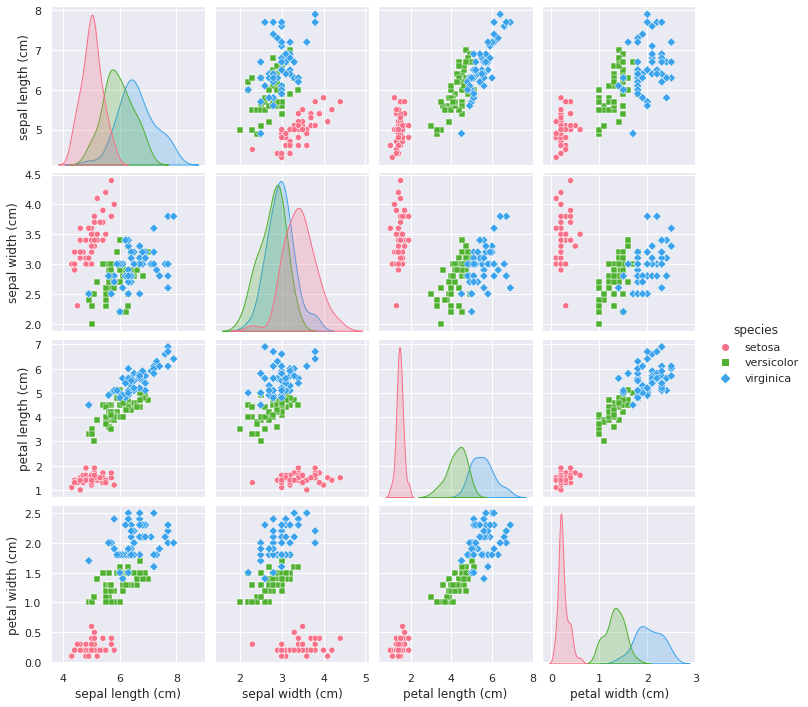

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()

g = sns.pairplot(
                    dff,
                    hue       = 'species',            #根據指定字串做資料分類
                    diag_kind = "kde",                #控制對角線上圖的類型   "hist" / "kde"
                    kind      = "scatter",            #控制非對角線上圖的類型 "reg" / "scatter"
                    palette   = "husl",               #調色
                    markers   = ['o', 's', 'D']
                )

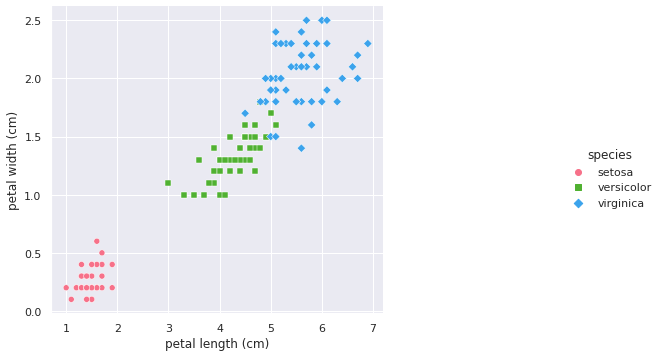

In [ ]:
g_=sns.pairplot(
                    dff,
                    x_vars    = [iris.feature_names[2]],
                    y_vars    = [iris.feature_names[3]],
                    hue       = 'species',
                    diag_kind = "kde",
                    palette   = "husl",
                    markers   = ['o', 's', 'D']
                )
g_.fig.set_size_inches(10, 6) 

In [ ]:
x    = iris.data[:, [2,3]]
y    = iris.target[:]

class_ = np.unique(y)
print('Class labels: ', class_)

print('class names: ',iris['target_names'])

Class labels:  [0 1 2]
class names:  ['setosa' 'versicolor' 'virginica']


## c.data splitting  
training set : testing set = 8 : 2

In [ ]:
# Splitting data into 80% training and 20% test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y)

## d.standardizing

### 說明

In [ ]:
sc = StandardScaler()
sc.fit(x)
xx= sc.transform(x)

In [ ]:
xxdf = pd.DataFrame(columns=[iris.feature_names[2], iris.feature_names[3], 'species'])
xxdf['petal length (cm)'] = xx[:,0]
xxdf['petal width (cm)']  = xx[:,1]
xxdf['species'] = iris['target']
xxdf['species'] = xxdf['species'].map({ 0:iris['target_names'][0],
                                    1:iris['target_names'][1], 
                                    2:iris['target_names'][2]})

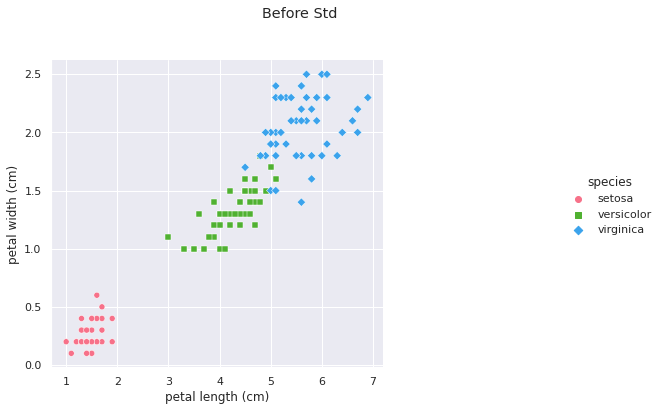

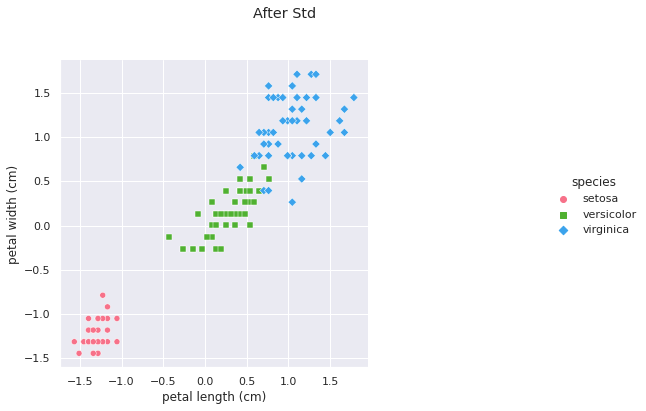

In [ ]:
g_=sns.pairplot(dff,
             x_vars=[iris.feature_names[2]],
             y_vars=[iris.feature_names[3]],
             hue='species', diag_kind="kde", palette="husl", markers=['o', 's', 'D'])
g_.fig.set_size_inches(10, 6) 
g_.fig.suptitle("Before Std", y=1.08)

g_g=sns.pairplot(xxdf,
             x_vars=[iris.feature_names[2]],
             y_vars=[iris.feature_names[3]],
             hue='species', diag_kind="kde", palette="husl", markers=['o', 's', 'D'])
g_g.fig.set_size_inches(10, 6)
g_g.fig.suptitle("After Std", y=1.08)

plt.show()

### Std

In [ ]:
# Standardizing the features
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

```
class_weight = {
                0: 2,
                1: 5,
                2: 9
                }
```

# 4.Training

In [ ]:
# Training
ppn = Perceptron(
                    max_iter=10, 
                    eta0=0.01,
                    #class_weight=class_weight,
                    random_state=1,
                    tol=None,
                    verbose=1)
ppn.fit(x_train_std, y_train)

-- Epoch 1
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 120, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 240, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 360, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 480, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 720, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 840, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 960, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 2, Bias: -0.010000, T: 1080, Avg. loss: 0.000000
Total training time: 0.01 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=10, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=None,
           validation_fraction=0.1, verbose=1, warm_start=False)

# 5.Predict

In [ ]:
# Testing
y_pred = ppn.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

Misclassified samples: 1
Accuracy: 0.97


array([[10,  0,  0],
       [ 1,  9,  0],
       [ 0,  0, 10]])

# 6.Training visualization

In [ ]:
# Training
ppn1 = Perceptron(
                    max_iter=10, eta0=0.01,
                    #class_weight=class_weight,
                    random_state=1,
                    tol=None,
                    n_jobs=None,
                    shuffle=True,
                    verbose=0,warm_start=True)

In [ ]:
def batch(x, y, n = 1, epoch = 1):
    l       = len(x)                # data長度
    num     = 0                     # batch次數計數器
    max_n   = int(l/n)              # 一次data可以batch的最大次數
    total_n = int((epoch*n)/l) + 1  # 訓練總共需要batch的次數
    
    for t in range(0, total_n, 1):  # 幾輪資料
        #----最後一輪----
        if t == total_n - 1:
            for idx in range(0, l, n): # 0~l筆資料 每n筆抓一次
                if num < ( epoch - max_n * t ):
                    num = num + 1
                    yield x[idx:min(idx + n, l)], y[idx:min(idx + n, l)]
                else:
                    break   
        #----跑完一輪資料----
        else:
            for idx in range(0, l, n): # 0~l筆資料 每n筆抓一次
                yield x[idx:min(idx + n, l)], y[idx:min(idx + n, l)]

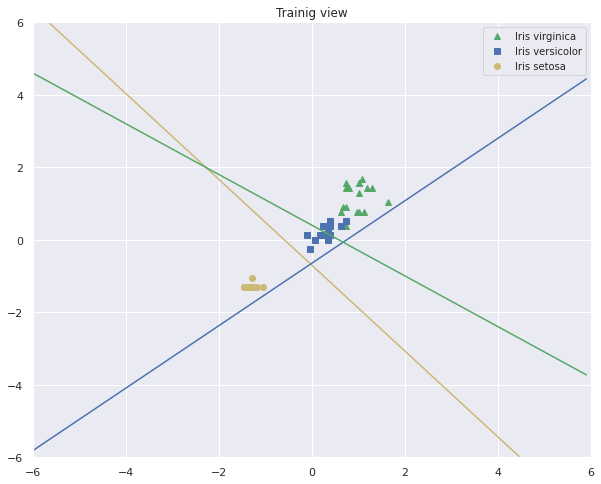

Epoch:  1     Acc:  0.64 %


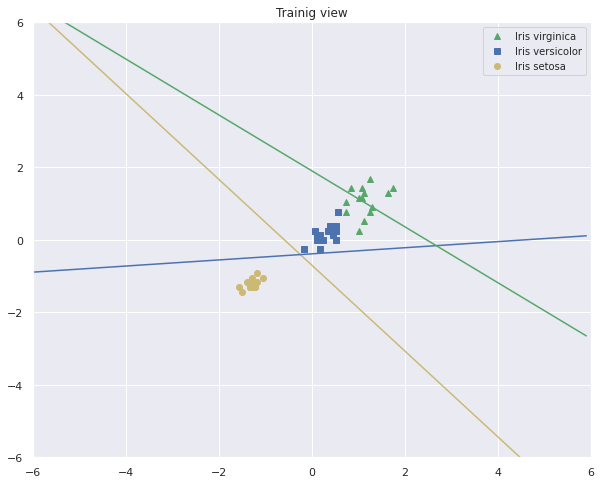

Epoch:  2     Acc:  0.92 %


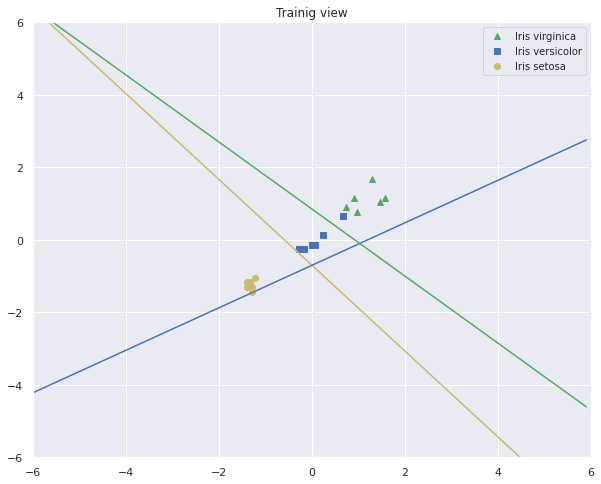

Epoch:  3     Acc:  0.7 %


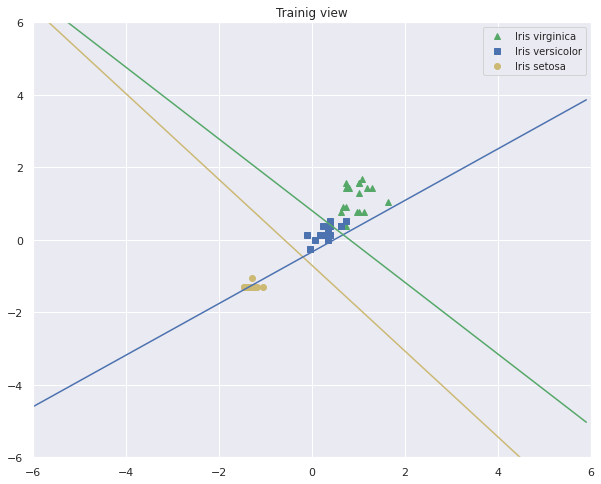

Epoch:  4     Acc:  0.8 %


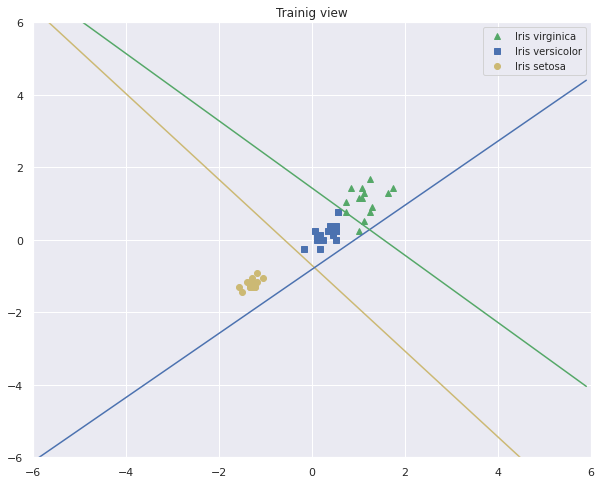

Epoch:  5     Acc:  0.7 %


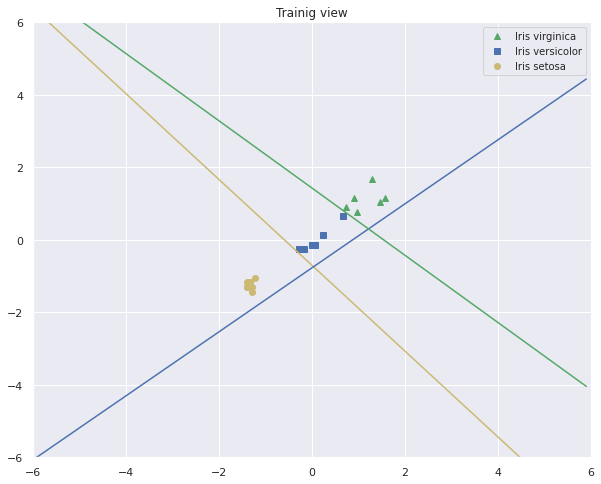

Epoch:  6     Acc:  0.7 %


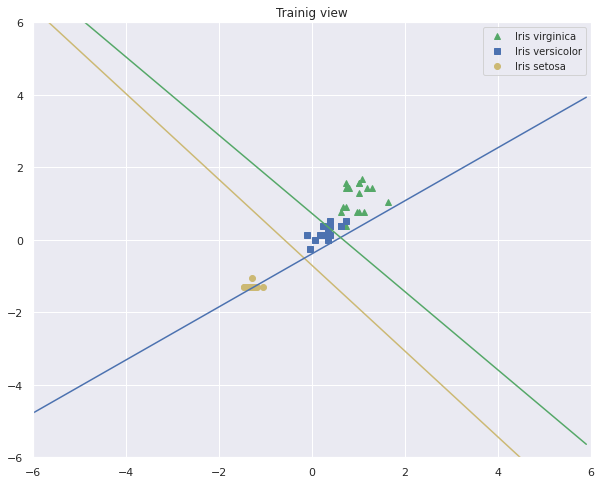

Epoch:  7     Acc:  0.76 %


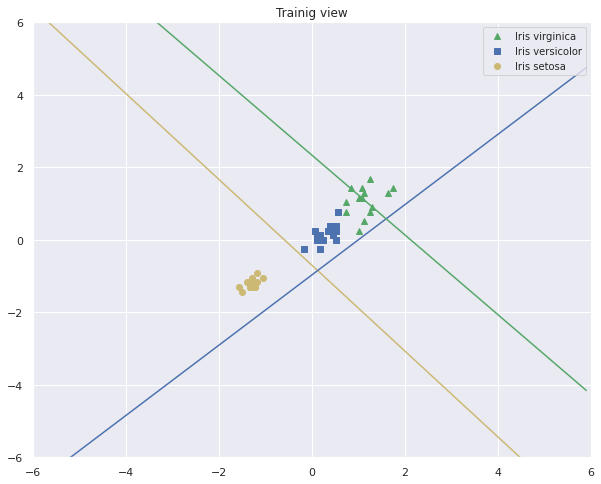

Epoch:  8     Acc:  0.8 %


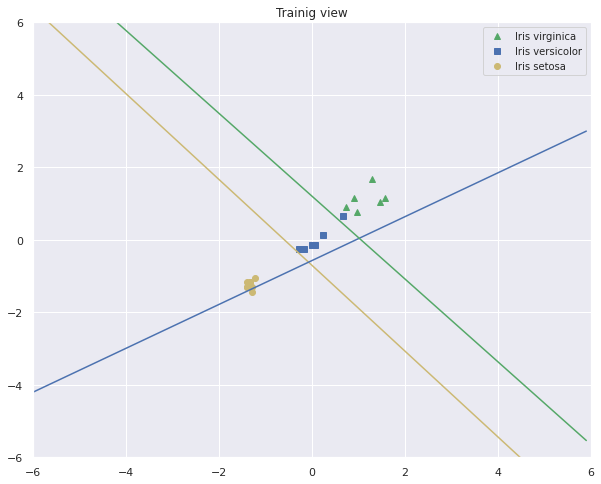

Epoch:  9     Acc:  0.7 %


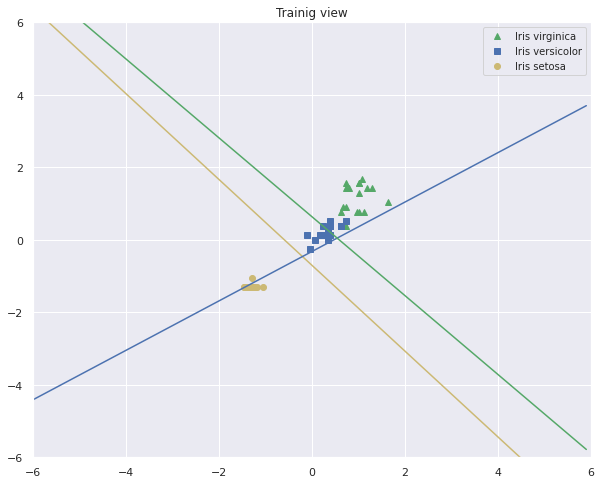

Epoch:  10     Acc:  0.7 %


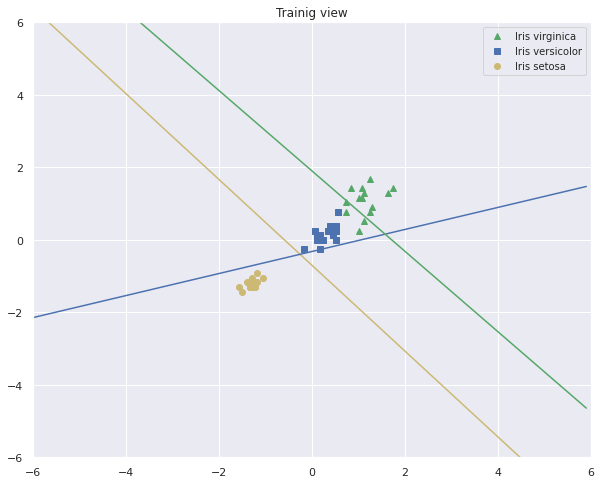

Epoch:  11     Acc:  0.94 %


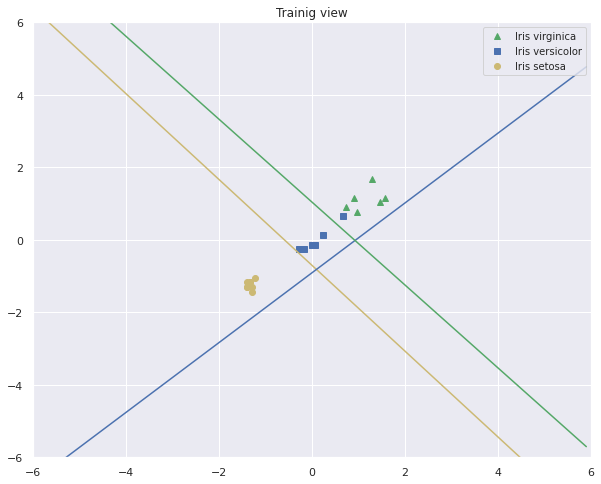

Epoch:  12     Acc:  0.7 %


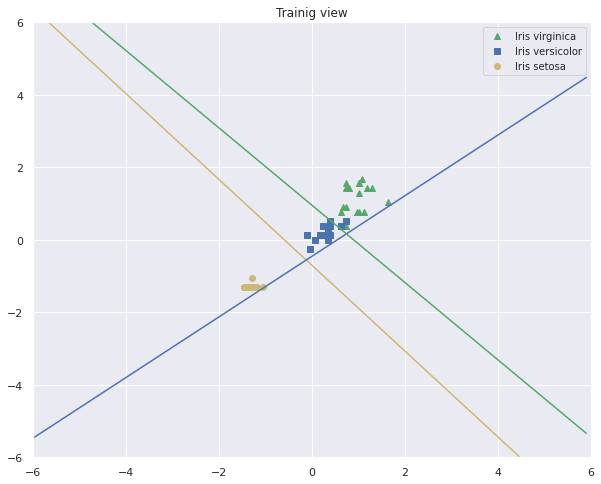

Epoch:  13     Acc:  0.82 %


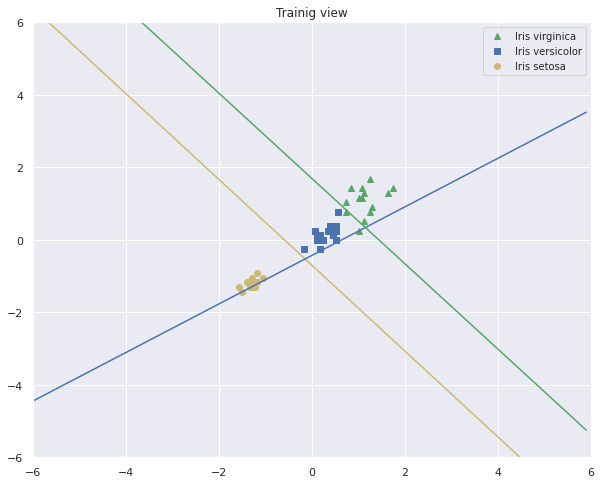

Epoch:  14     Acc:  0.92 %


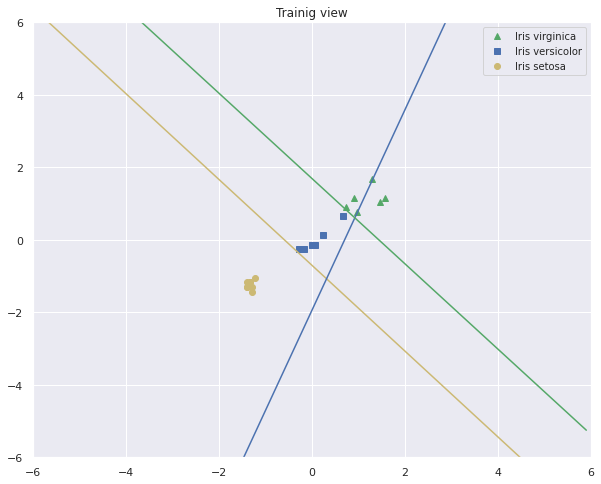

Epoch:  15     Acc:  0.75 %


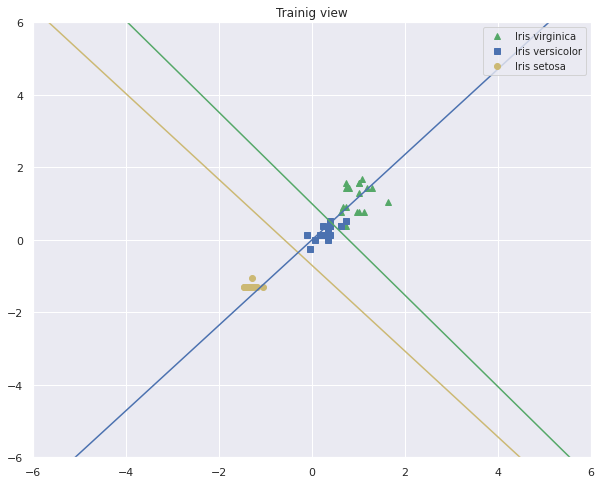

Epoch:  16     Acc:  0.94 %


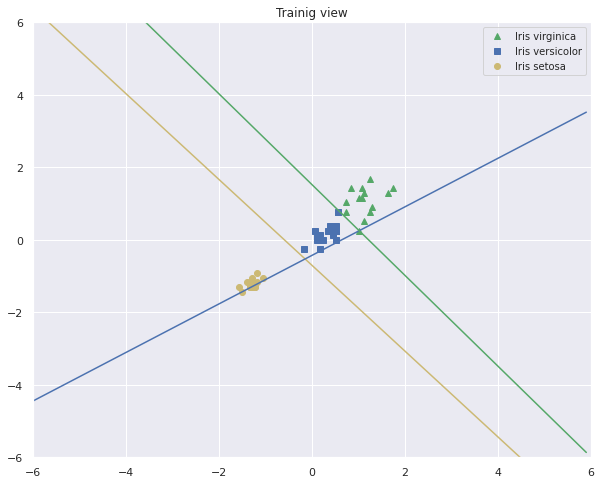

Epoch:  17     Acc:  0.94 %


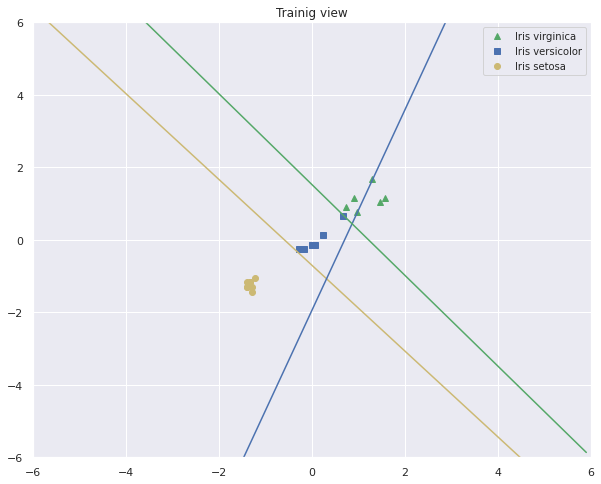

Epoch:  18     Acc:  0.75 %


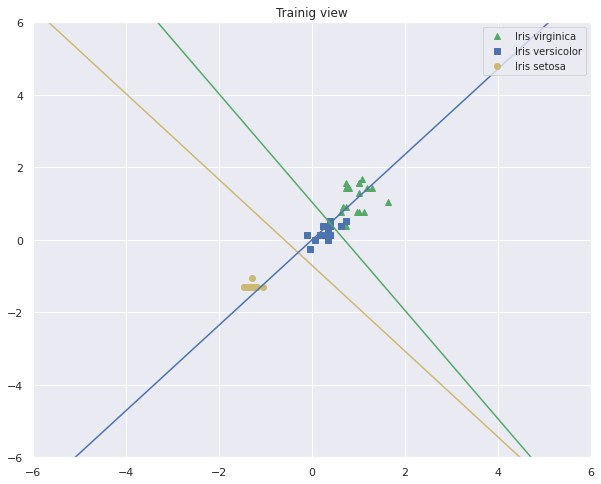

Epoch:  19     Acc:  0.92 %


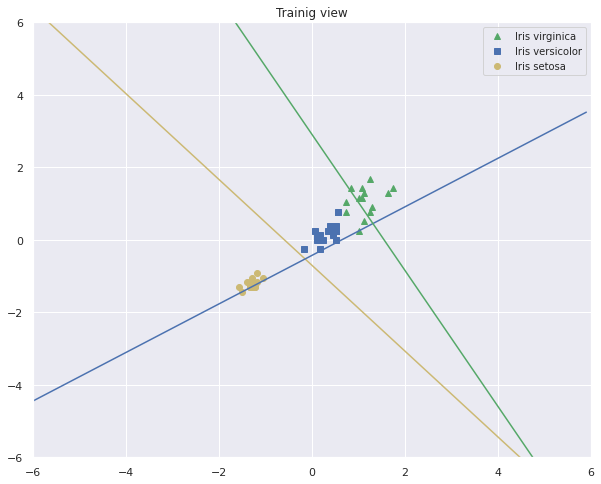

Epoch:  20     Acc:  0.9 %


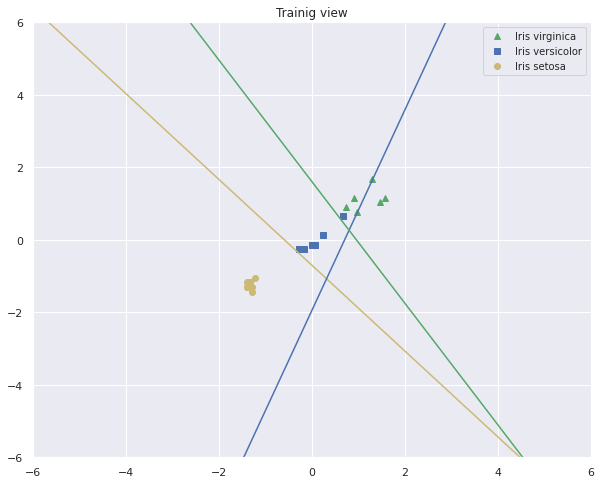

Epoch:  21     Acc:  0.75 %


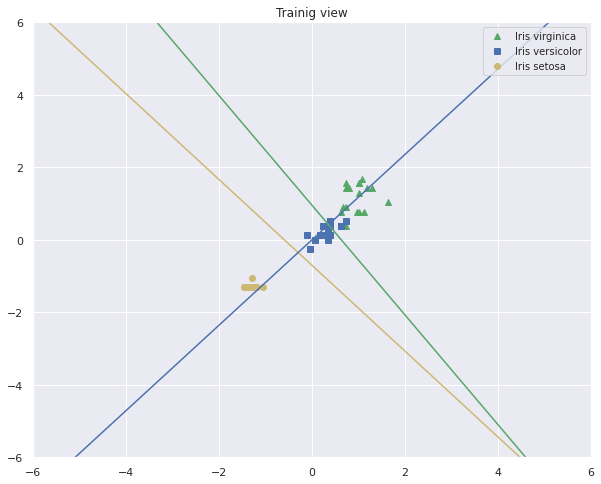

Epoch:  22     Acc:  0.92 %


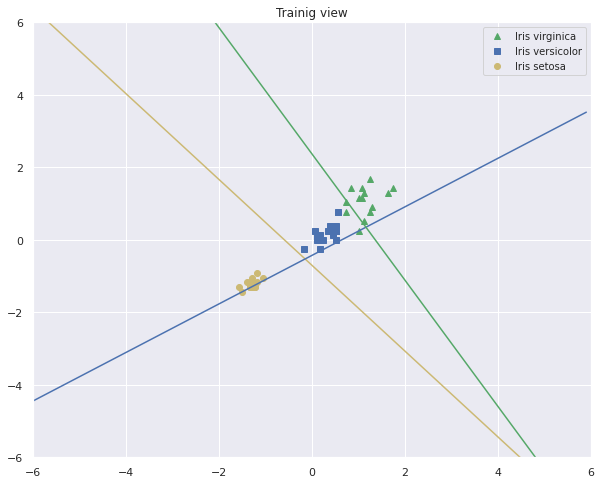

Epoch:  23     Acc:  0.92 %


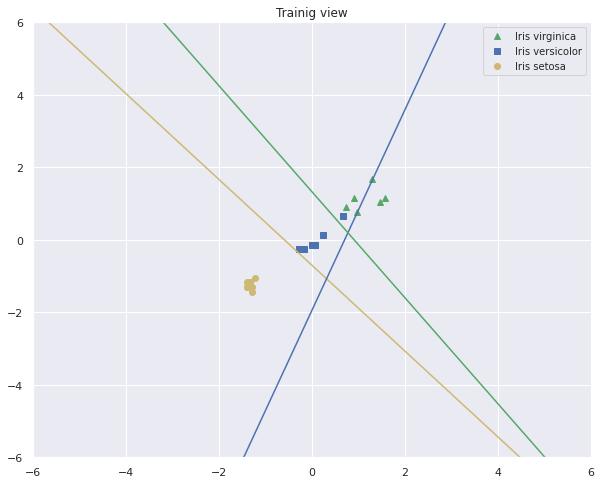

Epoch:  24     Acc:  0.75 %


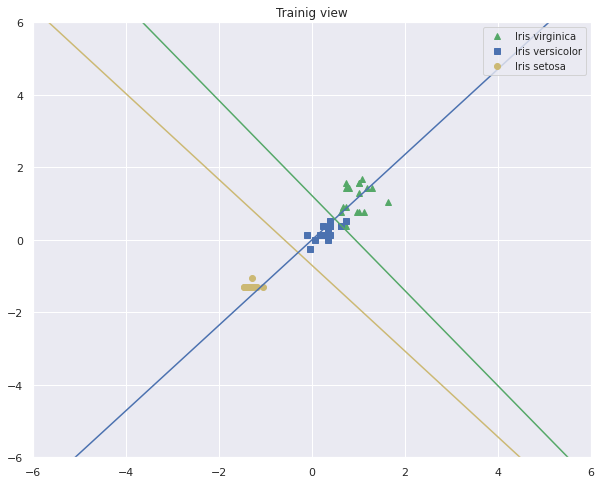

Epoch:  25     Acc:  0.94 %


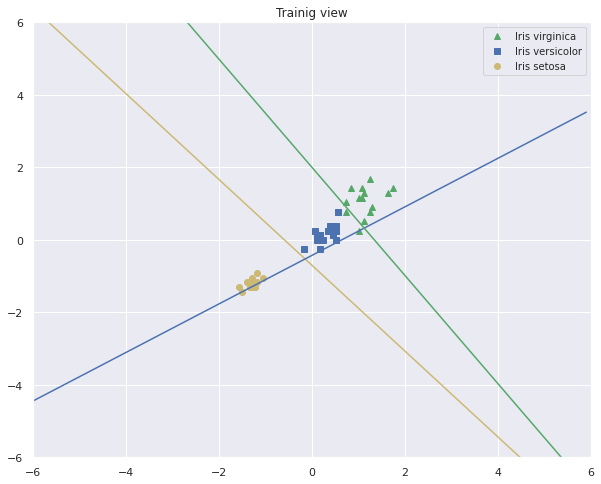

Epoch:  26     Acc:  0.92 %


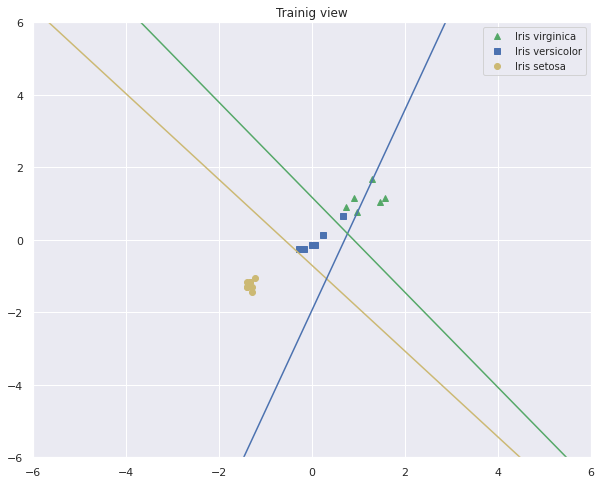

Epoch:  27     Acc:  0.75 %


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Epoch = 20
ax, ay = 6, 6
x = np.arange(-ax, ax, 0.1)
batcherator = batch(x_train_std, y_train, 50, Epoch)

for i, (xdata, ydata) in enumerate(batcherator):
    ppn1.partial_fit(xdata, ydata, classes=class_)

    w = ppn1.coef_
    bias = ppn1.intercept_

    x0 = -(x*w[0][0]+bias[0])/w[0][1]
    x1 = -(x*w[1][0]+bias[1])/w[1][1]
    x2 = -(x*w[2][0]+bias[2])/w[2][1]

    plt.figure(figsize=(10, 8))
    plt.xlim(-ax, ax)
    plt.ylim(-ay, ay)
    
    plt.plot(xdata[ydata==2, 0], xdata[ydata==2, 1], "g^", label="Iris virginica")
    plt.plot(xdata[ydata==1, 0], xdata[ydata==1, 1], "bs", label="Iris versicolor")
    plt.plot(xdata[ydata==0, 0], xdata[ydata==0, 1], "yo", label="Iris setosa")
    plt.legend(loc="upper right", fontsize=10)

    plt.plot(x, x0, 'y')
    plt.plot(x, x1, 'b')
    plt.plot(x, x2, 'g')
    
    plt.title('Trainig view')
    plt.show()
    acc = ppn1.score(xdata, ydata)

    print('Epoch: ', i+1,'    Acc: ', round(acc, 2),'%')
    #print('\nModel parameters' )
    #print('coef:', w)
    #print('bias:', bias)

In [ ]:
# Testing
y_pred = ppn1.predict(x_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm

Misclassified samples: 9
Accuracy: 0.70


array([[10,  0,  0],
       [ 5,  1,  4],
       [ 0,  0, 10]])

## a.decision boundary of training set

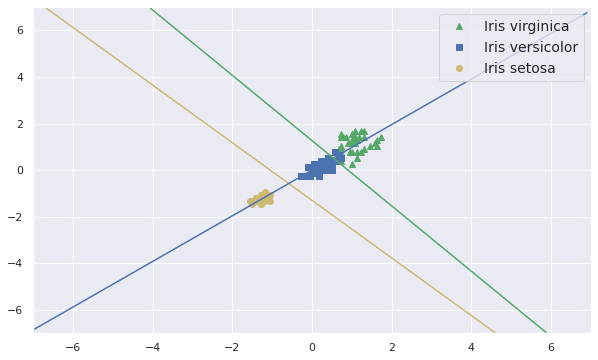

In [ ]:
ax, ay = 7, 7
x = np.arange(-ax, ax, 0.1)
y = np.arange(-ay, ay, 0.1)
w = ppn.coef_
bias = ppn.intercept_

x0 = -(x*w[0][0]+bias[0])/w[0][1]
x1 = -(x*w[1][0]+bias[1])/w[1][1]
x2 = -(x*w[2][0]+bias[2])/w[2][1]

plt.figure(figsize=(10, 6))
plt.xlim(-ax, ax)
plt.ylim(-ay, ay)

xdata = x_train_std
ydata = y_train
plt.plot(xdata[ydata==2, 0], xdata[ydata==2, 1], "g^", label="Iris virginica")
plt.plot(xdata[ydata==1, 0], xdata[ydata==1, 1], "bs", label="Iris versicolor")
plt.plot(xdata[ydata==0, 0], xdata[ydata==0, 1], "yo", label="Iris setosa")
plt.legend(loc="upper right", fontsize=14)

plt.plot(x, x0, 'y')
plt.plot(x, x1, 'b')
plt.plot(x, x2, 'g')
    

acc = ppn.score(xdata, ydata)
#print('coef:', w)
#print('bias:', bias)
plt.show()

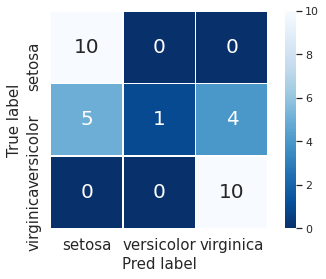

In [ ]:
# Plot confusion matrix

target_names = ['setosa', 'versicolor', 'virginica']
conf_m = pd.DataFrame(cm,
            index = target_names,
            columns = target_names)
fig, ax = plt.subplots(figsize = (6, 4))

sns.heatmap(
            conf_m, annot=True, annot_kws={"size": 20},
            cmap='Blues_r', fmt='g', linewidth=0.5, square=True
            )
plt.ylabel('True label', fontsize=15)
plt.xlabel('Pred label', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

## b.decision boundary of testing set

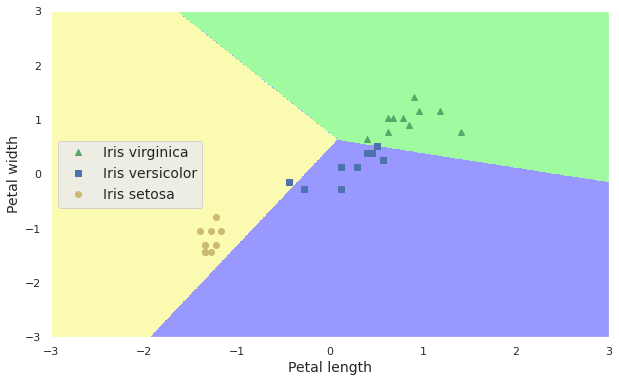

In [ ]:
ax, ay = 3, 3
x = np.linspace(-ax, ax, num=500)
#plt.xlim(-ax, ax)
#plt.ylim(-ay, ay)
#X_new = np.c_[x0.ravel(), x1.ravel()]

x0, x1 = np.meshgrid(x, x)
Z = ppn.predict((np.c_[x0.ravel(), x1.ravel()]))
Zz = Z.reshape(x0.shape)
plt.figure(figsize=(10, 6))
plt.plot(x_test_std[y_test==2, 0], x_test_std[y_test==2, 1], "g^", label="Iris virginica")
plt.plot(x_test_std[y_test==1, 0], x_test_std[y_test==1, 1], "bs", label="Iris versicolor")
plt.plot(x_test_std[y_test==0, 0], x_test_std[y_test==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x, x, Zz, alpha=1, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
#plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
#plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()